# Exploring Spotify API Dataset
## Setting up Notebook

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from prepare import prepare_df
from preprocessing import spotify_split

In [57]:
# Acquire the dataframe from our csv
df = pd.read_csv('full-playlist.csv', index_col=0)
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [58]:
# Run the prepare_df function on the dataframe
df = prepare_df(df)
df

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
track_id,,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,tay-k,trapman,2020-07-12,trapman,36,Tay-K,0.792,0.594,2,-8.544,...,1,1,2J1hMj78HfdcMrmL2Sk6eR,single,232,3,0,2020,07,12
5PtMwNq8Dp31uYdGGacVJE,lil wyte,doubt me now,2003-03-04,oxy cotton,55,Hypnotize Minds Productions,0.816,0.578,9,-6.912,...,1,11,2lwxcemR1muymEHNMblCpm,album,193,3,0,2003,03,04
6s8EhlBn2PIoESylkXnwYc,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,46,NMG/G-HUSET,0.649,0.798,0,-6.450,...,1,11,6va2RTYO2ois7t88RN0LhJ,album,254,4,0,2019,11,29
2e9EZ2V5QGGZPMJacO3y0Y,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),71,Asylum/Warner Records,0.705,0.702,0,-4.783,...,1,9,6MQtWELG7aRX7CkAzQ6nLM,album,250,4,1,2010,10,01
3ZRd5Z0fiYtASLdEPPb16m,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),55,Hypnotize Minds Productions,0.838,0.793,11,-5.470,...,1,5,4QzaueQPQa0lqrMmQoh4v0,album,261,4,1,2001,02,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5G9IXRzPaRJssJE76TDenY,tkay maidza,shook,2020-05-12,shook,26,4AD,0.895,0.791,4,-4.581,...,1,1,5TUlKh4QEavBL1oilV4y86,single,162,2,0,2020,05,12
0g3zIOFTdkwgJdR48usYgY,beyoncé,the lion king: the gift [deluxe edition],2020-07-31,my power,73,Parkwood Entertainment/Columbia,0.769,0.856,7,-4.923,...,1,12,7kUuNU2LRmr9XbwLHXU9UZ,album,260,4,0,2020,07,31
75Z53FMCvlupjHfAh9XgDo,shenseea,the sidechick song,2020-03-09,the sidechick song,45,Attomatic Records - Romeich Major,0.736,0.615,8,-4.716,...,1,1,0LUbxj9I4VJIVui4m2UGhC,single,193,3,0,2020,03,09


In [63]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')

Shape of train: (4012, 29) | Shape of validate: (861, 29) | Shape of test: (860, 29)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


In [69]:
train.head()

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,0.471,4,-9.934,...,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2019,04,19
0HO8pCseEpgozNi3z0R4bc,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,0.518,10,-10.126,...,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2015,03,17
643K3eEgRvdJiXjSzlz7dg,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,0.671,1,-6.050,...,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,1998,08,11
08EabdvPIHC4KBW7LfynPP,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,0.507,6,-10.076,...,1,2,2W2EmEpud13QHlhCFS9P8g,album,234,3,0,1993,10,12
6B2ZDVgJ0lHLgV9xC2PAJh,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,0.808,6,-5.468,...,1,9,2n4GKr0nKfFWoSTWZuNB9Z,album,266,4,1,2001,10,22


In [152]:
train.popularity.mean()

38.33150548354935

## Exploring/Visualizing Label vs. Popularity

In [113]:
biggest_labels = train.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
biggest_labels

,mean,count
label,,
Def Jam Recordings,43.257732,97
Rockstarr Music Group,8.013889,72
Columbia,58.312500,64
Atlantic Records,37.777778,63
Atlantic Records/ATG,33.333333,57
Nicki Minaj/Cash Money,44.185185,54
300 Entertainment,63.018868,53
"G59 Records, LLC",46.760000,50
Universal Music Group,0.060000,50


In [230]:
top_ten_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(10).index)
print(top_ten_labels)
print()
top_five_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(5).index)
print(top_five_labels)

['Generation Now/Atlantic', '300 Entertainment', 'Columbia', 'Republic Records', 'Quality Control Music/Motown Records', 'G59 Records, LLC', 'Nicki Minaj/Cash Money', 'Def Jam Recordings', 'Jive', 'M.A Music / 3D']

['Generation Now/Atlantic', '300 Entertainment', 'Columbia', 'Republic Records', 'Quality Control Music/Motown Records']


In [231]:
pattern = '|'.join(top_ten_labels)
pattern2 = '|'.join(top_five_labels)

In [233]:
train['top_ten_label'] = train.label.str.contains(pattern)
train['top_five_label'] = train.label.str.contains(pattern2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [234]:
train['top_ten_label'] = train.top_ten_label.astype('int')
train['top_five_label'] = train.top_five_label.astype('int')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [240]:
print(f'{train.top_ten_label.value_counts()}\n')

print(train.top_five_label.value_counts())

0    3394
1     568
Name: top_ten_label, dtype: int64

0    3675
1     287
Name: top_five_label, dtype: int64


Text(0.5, 1.0, 'Avg popularity of tracks produced by top ten labels vs total avg')

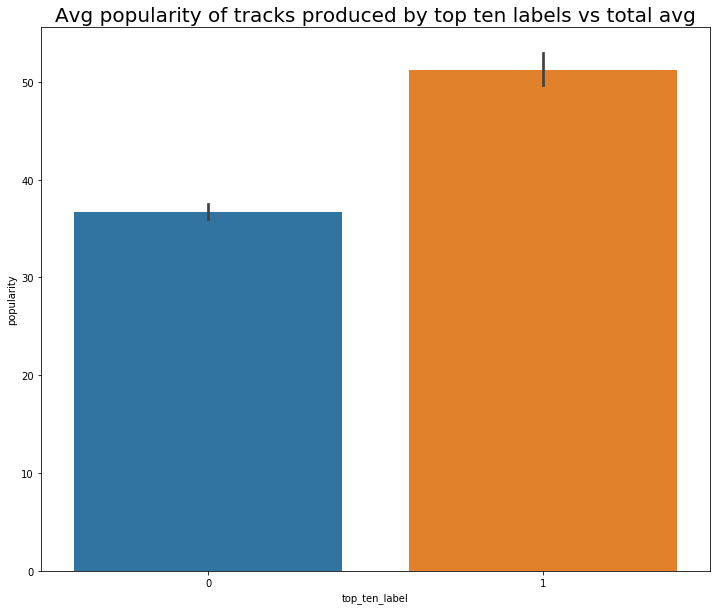

In [237]:
plt.figure(figsize=(12,10))
sns.barplot(x=train.top_ten_label, y=train.popularity)
plt.title('Avg popularity of tracks produced by top ten labels vs total avg', fontsize=20)

In [106]:
df[df.label == 'Universal Music Group'].popularity.value_counts()

0    65
1     3
2     1
Name: popularity, dtype: int64

In [229]:
df[df.label == 'Rockstarr Music Group'].release_date.value_counts()

2014-05-15    41
2014-05-12    20
2011-03-28    16
2018-10-19     7
2016-12-03     5
Name: release_date, dtype: int64

In [92]:
train.duration_seconds.sort_values().head(58)

track_id
1lZWbmo1z6aSWEClUbljTq    13
5hFjdBt4CUJC5qC5AHiyzj    18
6pIXWGh8myeYOPJXUeMUrH    18
0SXZoLAD5MwbyYo4Puz2Te    19
0o95G9jx5D4MPepkPr4vEI    19
4IGcllu5ElkhYJD8gB5n5R    21
1BQYuDMFroaciJTvFt6Nkn    23
3BgwOI1jT8l6dFeAiESJVM    24
4XNF6h3MPEdBhlFkci0uZj    25
1fJmu2NuPZTUSBa1vyyWa6    29
53vTOt3KKo5JsE3f4Yjnde    30
1WPBD8Vw0LrG4nSxHNolEu    30
28R7qToaTp1JmIUqFBciGQ    33
6Op8OAAzNyCbsZ2nfCAMHq    36
3Zf9tk3vIX9UQmXtP10G2n    36
6jZKx1SYqVyIRELwJFWrJJ    36
58dsRKNbbcxQT3BywPdvpM    36
0YTwG0KfvR7JVkl54uBtqa    38
73tRJV1iPSaDO4QAvIJ8uf    38
6EmHzwlIqHdoeVFPuIDDNH    38
3POCBDGY3gn0OpW5KNaveD    40
4xXjH2OMjlkTWMZDKpAXP2    40
1opCPqNpNS8SonPLrWIbBy    41
7HgyP0n7pyJbMlyNBZ2qtF    41
20LhHCpjKNyatFAjDaxRAw    42
7Ekp79UXg1ZoN1RDeYvQyU    44
16fYuBwMogSAv2k6UhJG7H    44
2EdObJBynLrd4hzgcxEwu3    45
6myChYzeC1k2Crkn24uAQQ    45
6GgsO51ZpEuh0kLRy08YS3    46
7axSEVsXKAYNSvxh1R1mwy    47
6amlu3Zg4498QoPWYtuCRS    48
576E1IW36EtBWDS0H29V1X    48
1Znlc3UZAbSodFaMBjdpsX    48
3pxHc

In [241]:
train.groupby('top_five_label').popularity.mean()

top_five_label
0    37.303946
1    58.156794
Name: popularity, dtype: float64

### Hypothesis Test  
$H_0$: There is no difference in popularity between tracks released by the top 10 labels or not.  
$H_a$: Tracks released by the top 10 labels are more likely to be popular.  
alpha = .05

In [246]:
x1 = train[train.top_ten_label == 1].popularity
x2 = train[train.top_ten_label == 0].popularity
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=14.517071488259496, pvalue=1.4542768204991895e-46)

Our p value is lower than our alpha which means we can reject the null hypothesis and conclude that a song being produced by the top 10 labels is correlated with its popularity.

In [182]:
def get_top_ten_labels(df):
    biggest_labels = df.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
    top_ten_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(10).index)
    pattern = '|'.join(top_ten_labels)
    df['top_ten_label'] = df.label.str.contains(pattern)
    df['top_ten_label'] = df.top_ten_label.astype('int')
    return df

In [188]:
train = get_top_ten_labels(train)

In [190]:
train.top_ten_label.value_counts()

0    3429
1     583
Name: top_ten_label, dtype: int64

## Worst Labels vs Popularity

In [208]:
biggest_labels = train.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
biggest_labels

,mean,count
label,,
Def Jam Recordings,43.257732,97
Rockstarr Music Group,8.013889,72
Columbia,58.312500,64
Atlantic Records,37.777778,63
Atlantic Records/ATG,33.333333,57
Nicki Minaj/Cash Money,44.185185,54
300 Entertainment,63.018868,53
"G59 Records, LLC",46.760000,50
Sugar Trap,40.391304,46


In [213]:
worst_five_labels = list(biggest_labels.sort_values(by='mean').head(5).index)
worst_five_labels

['Rockstarr Music Group',
 'eOne Music',
 'Polydor Records',
 'The Orchard',
 'Hardcover/RCA Records']

In [214]:
pattern = '|'.join(worst_five_labels)
train['worst_five_label'] = train.label.str.contains(pattern)
train['worst_five_label'] = train.worst_five_label.astype('int')
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,top_ten_label,worst_ten_label,worst_five_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,0.471,4,-9.934,...,single,142,2,0,2019,04,19,0,0,0
0HO8pCseEpgozNi3z0R4bc,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,0.518,10,-10.126,...,album,120,2,0,2015,03,17,0,0,0
643K3eEgRvdJiXjSzlz7dg,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,0.671,1,-6.050,...,album,252,4,0,1998,08,11,0,0,0
08EabdvPIHC4KBW7LfynPP,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,0.507,6,-10.076,...,album,234,3,0,1993,10,12,0,0,0
6B2ZDVgJ0lHLgV9xC2PAJh,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,0.808,6,-5.468,...,album,266,4,1,2001,10,22,0,0,0


In [219]:
train.worst_ten_label.value_counts()

0    3459
1     503
Name: worst_ten_label, dtype: int64

In [223]:
train.groupby('worst_five_label').popularity.mean()

worst_five_label
0    39.873206
1    18.900000
Name: popularity, dtype: float64

### Hypothesis Test  2
$H_0$: There is no difference in popularity between tracks released by the worst 5 labels or not.  
$H_a$: Tracks released by the worst 5 labels are more likely to be unpopular.  
alpha = .05

In [222]:
x1 = train[train.worst_five_label == 1].popularity
x2 = train[train.worst_five_label == 0].popularity
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-13.03889168931012, pvalue=4.4259414799537905e-38)

In [256]:
def get_labels_features(df):
    biggest_labels = df.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
    top_ten_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(10).index)
    top_five_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(5).index)
    worst_ten_labels = list(biggest_labels.sort_values(by='mean').head(10).index)
    worst_five_labels = list(biggest_labels.sort_values(by='mean').head(5).index)
    pattern1 = '|'.join(top_ten_labels)
    pattern2 = '|'.join(top_ten_labels)
    pattern3 = '|'.join(top_ten_labels)
    pattern4 = '|'.join(top_ten_labels)
    df['top_ten_label'] = df.label.str.contains(pattern1)
    df['top_five_label'] = df.label.str.contains(pattern1)
    df['worst_ten_label'] = df.label.str.contains(pattern1)
    df['worst_five_label'] = df.label.str.contains(pattern1)
    df['top_ten_label'] = df.top_ten_label.astype('int')
    df['top_five_label'] = df.top_five_label.astype('int')
    df['worst_ten_label'] = df.worst_ten_label.astype('int')
    df['worst_five_label'] = df.worst_five_label.astype('int')
    return df

In [266]:
train = get_labels_features(train)
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,top_ten_label,top_five_label,worst_ten_label,worst_five_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,0.471,4,-9.934,...,142,2,0,2019,04,19,0,0,0,0
0HO8pCseEpgozNi3z0R4bc,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,0.518,10,-10.126,...,120,2,0,2015,03,17,0,0,0,0
643K3eEgRvdJiXjSzlz7dg,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,0.671,1,-6.050,...,252,4,0,1998,08,11,0,0,0,0
08EabdvPIHC4KBW7LfynPP,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,0.507,6,-10.076,...,234,3,0,1993,10,12,0,0,0,0
6B2ZDVgJ0lHLgV9xC2PAJh,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,0.808,6,-5.468,...,266,4,1,2001,10,22,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6Hf3lTdh7gNQO3GoVw9CEM,bree runway,2000and4eva,2020-11-06,little nokia,54,EMI,0.708,0.578,11,-4.355,...,139,2,0,2020,11,06,0,0,0,0
1HnYtO4YEAMf98bu3hiYNA,nadia rose,highly flammable,2017-01-13,poltergeist (feat. alika),38,Relentless Records,0.457,0.454,9,-10.185,...,237,3,1,2017,01,13,0,0,0,0
0IShCbw4JJEpcmZiTwAena,tierra whack,whack world,2018-05-30,dr. seuss,64,Tierra Whack,0.793,0.605,1,-9.781,...,60,1,0,2018,05,30,0,0,0,0


In [270]:
del train['top_ten_label']
del train['top_five_label']
del train['worst_ten_label']
del train['worst_five_label']

In [267]:
df

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,popularity_bin
track_id,,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,tay-k,trapman,2020-07-12,trapman,36,Tay-K,0.792,0.594,2,-8.544,...,1,2J1hMj78HfdcMrmL2Sk6eR,single,232,3,0,2020,07,12,Moderate
5PtMwNq8Dp31uYdGGacVJE,lil wyte,doubt me now,2003-03-04,oxy cotton,55,Hypnotize Minds Productions,0.816,0.578,9,-6.912,...,11,2lwxcemR1muymEHNMblCpm,album,193,3,0,2003,03,04,High
6s8EhlBn2PIoESylkXnwYc,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,46,NMG/G-HUSET,0.649,0.798,0,-6.450,...,11,6va2RTYO2ois7t88RN0LhJ,album,254,4,0,2019,11,29,Moderately Low
2e9EZ2V5QGGZPMJacO3y0Y,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),71,Asylum/Warner Records,0.705,0.702,0,-4.783,...,9,6MQtWELG7aRX7CkAzQ6nLM,album,250,4,1,2010,10,01,High
3ZRd5Z0fiYtASLdEPPb16m,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),55,Hypnotize Minds Productions,0.838,0.793,11,-5.470,...,5,4QzaueQPQa0lqrMmQoh4v0,album,261,4,1,2001,02,13,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5G9IXRzPaRJssJE76TDenY,tkay maidza,shook,2020-05-12,shook,26,4AD,0.895,0.791,4,-4.581,...,1,5TUlKh4QEavBL1oilV4y86,single,162,2,0,2020,05,12,Moderately Low
0g3zIOFTdkwgJdR48usYgY,beyoncé,the lion king: the gift [deluxe edition],2020-07-31,my power,73,Parkwood Entertainment/Columbia,0.769,0.856,7,-4.923,...,12,7kUuNU2LRmr9XbwLHXU9UZ,album,260,4,0,2020,07,31,High
75Z53FMCvlupjHfAh9XgDo,shenseea,the sidechick song,2020-03-09,the sidechick song,45,Attomatic Records - Romeich Major,0.736,0.615,8,-4.716,...,1,0LUbxj9I4VJIVui4m2UGhC,single,193,3,0,2020,03,09,Moderately High


In [271]:
train

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,0.471,4,-9.934,...,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2019,04,19
0HO8pCseEpgozNi3z0R4bc,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,0.518,10,-10.126,...,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2015,03,17
643K3eEgRvdJiXjSzlz7dg,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,0.671,1,-6.050,...,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,1998,08,11
08EabdvPIHC4KBW7LfynPP,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,0.507,6,-10.076,...,1,2,2W2EmEpud13QHlhCFS9P8g,album,234,3,0,1993,10,12
6B2ZDVgJ0lHLgV9xC2PAJh,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,0.808,6,-5.468,...,1,9,2n4GKr0nKfFWoSTWZuNB9Z,album,266,4,1,2001,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6Hf3lTdh7gNQO3GoVw9CEM,bree runway,2000and4eva,2020-11-06,little nokia,54,EMI,0.708,0.578,11,-4.355,...,1,2,4lmOcEBG9fJjc6UeMbttVt,album,139,2,0,2020,11,06
1HnYtO4YEAMf98bu3hiYNA,nadia rose,highly flammable,2017-01-13,poltergeist (feat. alika),38,Relentless Records,0.457,0.454,9,-10.185,...,1,7,3rPYGgkKveNxWMGRUKtC00,album,237,3,1,2017,01,13
0IShCbw4JJEpcmZiTwAena,tierra whack,whack world,2018-05-30,dr. seuss,64,Tierra Whack,0.793,0.605,1,-9.781,...,1,14,3ogNAkUhvQy0cFOfLoR6Y8,album,60,1,0,2018,05,30


~~~
cid = YOURCLIENTID
c_secret = YOURCLIENTSECRET
~~~
